## **Initializing**

In [47]:
import warnings                               
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytz

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from mpl_toolkits.axes_grid1 import make_axes_locatable

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

## **Introduction to the data**

The dataset in this assignment provides insights into EV charging station usage in Palo Alto, California, covering avaliability, utilization, and demand. It includes details on station locations, connector types, session durations, and energy consumption. This data helps analyze trends, identify peak usage, assess performance, and develop solutions to improve EV charging efficienvy and accessibility.

In the first section, we are loading and exploring the dataset, ensuring a clear understanding of its structure, content, and potential challenges.

In [48]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)

In [49]:
# Display the first few rows of the dataset
data.head()

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7/30/2011 0:02                   0:02:06   
2                 7/30/2011 12:34                   4:17:32   
3                 7/30/2011 16:55                   2:03:24   
4                 7/30/2011 20:03                   1:11:24   

  Charging Time (hh:mm:ss)  ...   Longitude  Currency  Fee  \
0                  1:54:03  ... -122.160309       USD  0.0   
1                  0:01:54  ... -122.160309       USD  0.0   
2                  4:17:28  ... -122.160309       USD  0.0   
3                  2:02:58  ... -122.160309       USD  0.0   
4                  0:43:54  ... -122.160309       USD  0.0   

              Ended By  Plug In Event Id Driver Postal Code  User ID County  \
0  Plug Out at Vehicle                 3            95124.0   3284.0    NaN   
1             Customer                 4            94301.0   4169.0    NaN   
2  Plug Out at Vehicle                 5            94301.0   4169.0    NaN   
3             Customer                 6            94302.0   2545.0    NaN   
4  Plug Out at Vehicle                 7            94043.0   3765.0    NaN   

  System S/N Model Number  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN  

[5 rows x 33 columns]

In [50]:
# Overview of the dataset
data.describe()

Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons)  \
count  259415.000000     259415.000000               259415.000000   
mean        8.544277          3.588596                    1.072306   
std         7.185462          3.017894                    0.901776   
min         0.010000          0.004000                    0.001000   
25%         3.784000          1.589000                    0.475000   
50%         6.868634          2.885000                    0.862000   
75%        11.458340          4.813000                    1.438000   
max        97.360000         40.891000                   12.219000   

         Port Number       EVSE ID    Postal Code       Latitude  \
count  259415.000000  1.804670e+05  259415.000000  259415.000000   
mean        1.591627  1.462973e+05   94302.315768      37.439565   
std         0.491534  2.429677e+05       1.941657       0.009621   
min         1.000000  3.792000e+03   94301.000000      37.422104   
25%         1.000000  4.358300e+04   94301.000000      37.428318   
50%         2.000000  1.074270e+05   94301.000000      37.444489   
75%         2.000000  1.745590e+05   94303.000000      37.446613   
max         2.000000  5.535441e+06   94306.000000      37.449375   

           Longitude            Fee  Plug In Event Id  Driver Postal Code  \
count  259415.000000  259415.000000      2.594150e+05       251013.000000   
mean     -122.151264       1.097481      1.188685e+08        94170.308255   
std         0.015382       1.934408      4.057750e+08         4249.837126   
min      -122.163239       0.000000      1.000000e+00         1013.000000   
25%      -122.162170       0.000000      1.573000e+03        94087.000000   
50%      -122.158272       0.000000      3.573000e+03        94304.000000   
75%      -122.145699       1.640000      6.340000e+03        94804.000000   
max      -122.112480      84.560000      1.609436e+09        99354.000000   

         System S/N  
count  1.804670e+05  
mean   1.443790e+11  
std    2.483280e+10  
min    1.023100e+11  
25%    1.231100e+11  
50%    1.427410e+11  
75%    1.705410e+11  
max    2.002410e+11

We check for missing values for each column, as well as the total number of rows and columns affected by missing data. Missing data can distort analysis and reduce model accuracy - indentifying missing values is the first step in deciding how to handle them.

In [51]:
# Check for missing values
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return

check_missing_values(data)

Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


Columns with excessive missing data were dropped, as filling missing values with e.g. mean would be inaccurate. Missing values in categorical columns like **Port Type** and **Model Number** were imputed, as we want to use these columns for further analysis. _sidste sætning kan slettets_

In [52]:
# Data cleaning 
threshold = 8000 #Dropping columns with more than 8000 missing values
cols_to_drop = data.columns[data.isnull().sum() > threshold]
data = data.drop(columns=cols_to_drop)

if 'Port Type' in data.columns: #Filling missing values in 'Port Type' column
    data['Port Type'] = data['Port Type'].fillna(data['Port Type'].mode()[0])

if 'Model Number' in data.columns: #Filling missing values in 'Model Number' column
    data['Model Number'] = data['Model Number'].fillna('Unknown')

if 'User ID' in data.columns: #Dropping rows with missing values in 'User ID' and converting to integer
    data = data.dropna(subset=['User ID'])
    data = data[pd.to_numeric(data['User ID'], errors='coerce').notnull()]
    data['User ID'] = data['User ID'].astype(int)

data = data.dropna()
print("Remaining missing values after cleaning:")
check_missing_values(data)

Remaining missing values after cleaning:
Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


Columns consisting of dates and timestamps, will be converted to datetime objects for easier manipulation and analysis.

New columns were added for analysis, including:
- Energy efficieny: The energy consumed per minute of charging.
- Temporal features: Day of the week, whether the session occured on a weekend or weekday, and whether it was during the day or night.

In [53]:
# Convert datetime columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce')

# Convert time durations to timedelta
data['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data['Total Duration (hh:mm:ss)'])
data['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)'])

# Convert durations to minutes
data['Total Charging Time (min)'] = data['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60
data['Total Duration (min)'] = data['Total Duration (hh:mm:ss)'].dt.total_seconds() / 60

# Calculate energy usage per minute
data['kWh per min'] = data['Energy (kWh)'] / data['Total Charging Time (min)']

# Add day of the week
data['Day of week'] = data['Start Date'].dt.dayofweek

# Add weekend vs. weekday column
data['Weekend/Weekday'] = data['Day of week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Add day vs. night column
data['Hour'] = data['Start Date'].dt.hour
data['Day/Night'] = data['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

The average daily energy consumption is calculated for each station and standardizes station names based on coordinates to ensure consistency.

In [54]:
# SLET HVIS VI IKKE SKAL HAVE BUBBLE PLOT MED

# Check for missing or inconsistent station data (Station Name, Latitude, Longitude)
station_data = data[['Station Name', 'Latitude', 'Longitude']].drop_duplicates()

# Summary of missing or inconsistent data
missing_summary = {
    "Total Stations": len(station_data),
    "Missing Latitude/Longitude": station_data.isnull().sum(),
    "Unique Station Names": station_data['Station Name'].nunique(),
}

# Aggregating average daily energy consumption per station
data['Date'] = data['Start Date'].dt.date  # Extract date for daily aggregation
avg_daily_energy = data.groupby(['Station Name', 'Latitude', 'Longitude', 'Date'])['Energy (kWh)'].sum().reset_index()
station_avg_energy = avg_daily_energy.groupby(['Station Name', 'Latitude', 'Longitude'])['Energy (kWh)'].mean().reset_index()

# Rename columns for clarity
station_avg_energy.rename(columns={'Energy (kWh)': 'Avg Daily Energy (kWh)'}, inplace=True)

missing_summary, station_avg_energy.head()

({'Total Stations': 70,
  'Missing Latitude/Longitude': Station Name    0
  Latitude        0
  Longitude       0
  dtype: int64,
  'Unique Station Names': 47},
                 Station Name   Latitude   Longitude  Avg Daily Energy (kWh)
 0  PALO ALTO CA / BRYANT # 1  37.446651 -122.161919               10.498500
 1   PALO ALTO CA / BRYANT #1  37.446373 -122.162331               11.541794
 2   PALO ALTO CA / BRYANT #1  37.446613 -122.162308               33.419116
 3   PALO ALTO CA / BRYANT #1  37.446651 -122.161919                9.008000
 4   PALO ALTO CA / BRYANT #2  37.446373 -122.162331                9.507960)

In [55]:
# SLET HVIS VI IKKE SKAL HAVE BUBBLE PLOT MED

# Standardizing station names based on coordinates
# Grouping by coordinates and assigning a representative name to each unique coordinate set
station_mapping = (
    station_avg_energy.groupby(['Latitude', 'Longitude'])['Station Name']
    .agg(lambda x: x.value_counts().idxmax())  # Most common name for each coordinate pair
    .reset_index()
)

# Mapping consistent names back to the original dataset
station_name_map = dict(zip(zip(station_mapping['Latitude'], station_mapping['Longitude']), station_mapping['Station Name']))
data['Standardized Station Name'] = data.apply(
    lambda row: station_name_map.get((row['Latitude'], row['Longitude']), row['Station Name']), axis=1
)

# Re-aggregate average daily energy with standardized station names
avg_daily_energy_standardized = data.groupby(['Standardized Station Name', 'Latitude', 'Longitude', 'Date'])['Energy (kWh)'].sum().reset_index()
station_avg_energy_standardized = avg_daily_energy_standardized.groupby(['Standardized Station Name', 'Latitude', 'Longitude'])['Energy (kWh)'].mean().reset_index()

# Rename columns for clarity
station_avg_energy_standardized.rename(columns={'Energy (kWh)': 'Avg Daily Energy (kWh)'}, inplace=True)
station_avg_energy_standardized.head()

Standardized Station Name   Latitude   Longitude  Avg Daily Energy (kWh)
0  PALO ALTO CA / BRYANT # 1  37.446651 -122.161919                9.604200
1   PALO ALTO CA / BRYANT #1  37.446373 -122.162331               17.249293
2   PALO ALTO CA / BRYANT #1  37.446613 -122.162308               33.411583
3   PALO ALTO CA / BRYANT #2  37.446510 -122.162140               34.132755
4   PALO ALTO CA / BRYANT #3  37.446583 -122.162109               26.414751

Observations are made in different time zones, which will be taken into account. Charging events will be split into hourly intervals.

In [56]:
# Map time zones
tz_mapping = {
    'PDT': 'US/Pacific',
    'PST': 'US/Pacific',
    'UTC': 'UTC'
}

# Localize and convert times to UTC
def localize_to_timezone(row, datetime_col, tz_col):
    tz_name = row[tz_col]
    timezone = pytz.timezone(tz_mapping.get(tz_name))
    return row[datetime_col].tz_localize(timezone, ambiguous='NaT', nonexistent='NaT')

data['Start Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'Start Date', 'Start Time Zone'), axis=1)
data['End Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'End Date', 'End Time Zone'), axis=1)
data['Start Date UTC'] = pd.to_datetime(data['Start Date Localized'], utc=True)
data['End Date UTC'] = pd.to_datetime(data['End Date Localized'], utc=True)

# Split events into hourly segments
def split_event_into_hours(row):
    start = row['Start Date UTC']
    end = row['End Date UTC']
    total_charging_time = row['Total Charging Time (min)']
    total_duration = row['Total Duration (min)']
    kWh_per_min = row['kWh per min']

    hourly_rows = []
    current_time = start.replace(minute=0, second=0, microsecond=0)

    while current_time < end:
        next_hour = current_time + pd.Timedelta(hours=1)
        charging_minutes = min((next_hour - start).total_seconds() / 60, total_charging_time) if start < next_hour else 0
        occupied_minutes = min((next_hour - start).total_seconds() / 60, total_duration) if start < next_hour else 0

        hourly_rows.append({
            'User ID': row['User ID'],
            'Station Name': row['Station Name'],
            'Hour': current_time,
            'Charging Time (min)': charging_minutes,
            'Occupied Time (min)': occupied_minutes,
            'Energy (kWh)': charging_minutes * kWh_per_min
        })

        current_time = next_hour

    return pd.DataFrame(hourly_rows)

hourly_data = pd.concat(data.apply(split_event_into_hours, axis=1).tolist(), ignore_index=True)

In [57]:
# Group hourly data by User ID, Station Name, Weekend/Weekday, and Day/Night
hourly_data['Day of week'] = hourly_data['Hour'].dt.dayofweek
hourly_data['Weekend/Weekday'] = hourly_data['Day of week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_data['Hour of day'] = hourly_data['Hour'].dt.hour
hourly_data['Day/Night'] = hourly_data['Hour of day'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

usage_patterns = hourly_data.groupby(['Station Name', 'Day of week']).agg({
    'Charging Time (min)': 'sum',
    'Occupied Time (min)': 'sum',
    'Energy (kWh)': 'sum'
}).reset_index()

In [58]:
# Pivot the table for better readability
usage_pivot = usage_patterns.pivot_table(index=['Station Name'], columns=['Day of week'],
                                                   values=['Charging Time (min)', 'Occupied Time (min)'],
                                                   fill_value=0)

# Flatten the multi-level columns for easier access
usage_pivot.columns = ['_'.join(map(str, col)).strip() for col in usage_pivot.columns.values]

# Display the pivot table
print("Usage Patterns (Weekend vs Weekday, Day vs Night):")
usage_pivot

Usage Patterns (Weekend vs Weekday, Day vs Night):


Charging Time (min)_0  Charging Time (min)_1  \
Station Name                                                                   
PALO ALTO CA / BRYANT # 1                1.861667e+01           4.563833e+02   
PALO ALTO CA / BRYANT #1                 7.187168e+05           8.312371e+05   
PALO ALTO CA / BRYANT #2                 8.094311e+05           8.397209e+05   
PALO ALTO CA / BRYANT #3                 2.214560e+05           2.405775e+05   
PALO ALTO CA / BRYANT #4                 1.922370e+05           1.985905e+05   
PALO ALTO CA / BRYANT #5                 2.104346e+05           2.482167e+05   
PALO ALTO CA / BRYANT #6                 2.873577e+05           2.951207e+05   
PALO ALTO CA / CAMBRIDGE #1              4.815106e+05           5.464258e+05   
PALO ALTO CA / CAMBRIDGE #2              4.309758e+05           4.853523e+05   
PALO ALTO CA / CAMBRIDGE #3              1.327225e+05           1.658976e+05   
PALO ALTO CA / CAMBRIDGE #4              9.636378e+04           1.188503e+05   
PALO ALTO CA / CAMBRIDGE #5              1.549029e+05           1.728656e+05   
PALO ALTO CA / HAMILTON #1               7.775380e+05           8.316658e+05   
PALO ALTO CA / HAMILTON #2               1.329022e+06           1.314940e+06   
PALO ALTO CA / HIGH #1                   5.401498e+05           5.284159e+05   
PALO ALTO CA / HIGH #2                   3.189761e+05           3.414878e+05   
PALO ALTO CA / HIGH #3                   4.011239e+05           3.607619e+05   
PALO ALTO CA / HIGH #4                   6.793641e+05           6.899720e+05   
PALO ALTO CA / MPL #1                    8.137522e+04           7.450753e+04   
PALO ALTO CA / MPL #2                    1.377625e+05           1.473803e+05   
PALO ALTO CA / MPL #3                    1.216550e+05           1.143823e+05   
PALO ALTO CA / MPL #4                    3.954394e+05           4.491403e+05   
PALO ALTO CA / MPL #5                    3.820037e+05           4.114579e+05   
PALO ALTO CA / MPL #6                    4.523202e+05           4.712924e+05   
PALO ALTO CA / RINCONADA LIB 1           3.686235e+05           3.622731e+05   
PALO ALTO CA / RINCONADA LIB 2           3.546952e+05           3.295920e+05   
PALO ALTO CA / RINCONADA LIB 3           3.972929e+05           3.587012e+05   
PALO ALTO CA / SHERMAN 1                 0.000000e+00           0.000000e+00   
PALO ALTO CA / SHERMAN 11                0.000000e+00           3.558000e+02   
PALO ALTO CA / SHERMAN 14                0.000000e+00           0.000000e+00   
PALO ALTO CA / SHERMAN 15                0.000000e+00           0.000000e+00   
PALO ALTO CA / SHERMAN 17                0.000000e+00           1.297167e+02   
PALO ALTO CA / SHERMAN 2                 1.629667e+02           0.000000e+00   
PALO ALTO CA / SHERMAN 3                 1.411550e+03           0.000000e+00   
PALO ALTO CA / SHERMAN 4                 1.584000e+02           5.238333e+01   
PALO ALTO CA / SHERMAN 5                 0.000000e+00           0.000000e+00   
PALO ALTO CA / SHERMAN 6                 0.000000e+00           0.000000e+00   
PALO ALTO CA / SHERMAN 7                 1.126433e+03           0.000000e+00   
PALO ALTO CA / SHERMAN 8                 3.109500e+02           0.000000e+00   
PALO ALTO CA / SHERMAN 9                 0.000000e+00           0.000000e+00   
PALO ALTO CA / TED THOMPSON #1           5.451577e+05           6.935597e+05   
PALO ALTO CA / TED THOMPSON #2           1.385916e+05           1.972560e+05   
PALO ALTO CA / TED THOMPSON #3           1.271081e+05           1.632381e+05   
PALO ALTO CA / TED THOMPSON #4           1.213747e+05           1.545549e+05   
PALO ALTO CA / WEBSTER #1                8.558367e+05           9.146439e+05   
PALO ALTO CA / WEBSTER #2                7.293184e+05           8.148488e+05   
PALO ALTO CA / WEBSTER #3                5.271801e+05           6.001481e+05   

                                Charging Time (min)_2  Charging Time (min)_3  \
Station Name                   

In [59]:
usage_pivot.to_csv('user_usage_patterns.csv')

## **Data visualization**

After preparing the data, key patterns are plotted to provide insights. The bubble plot depicts average daily energy consumption geographically to identify high-demand stations.

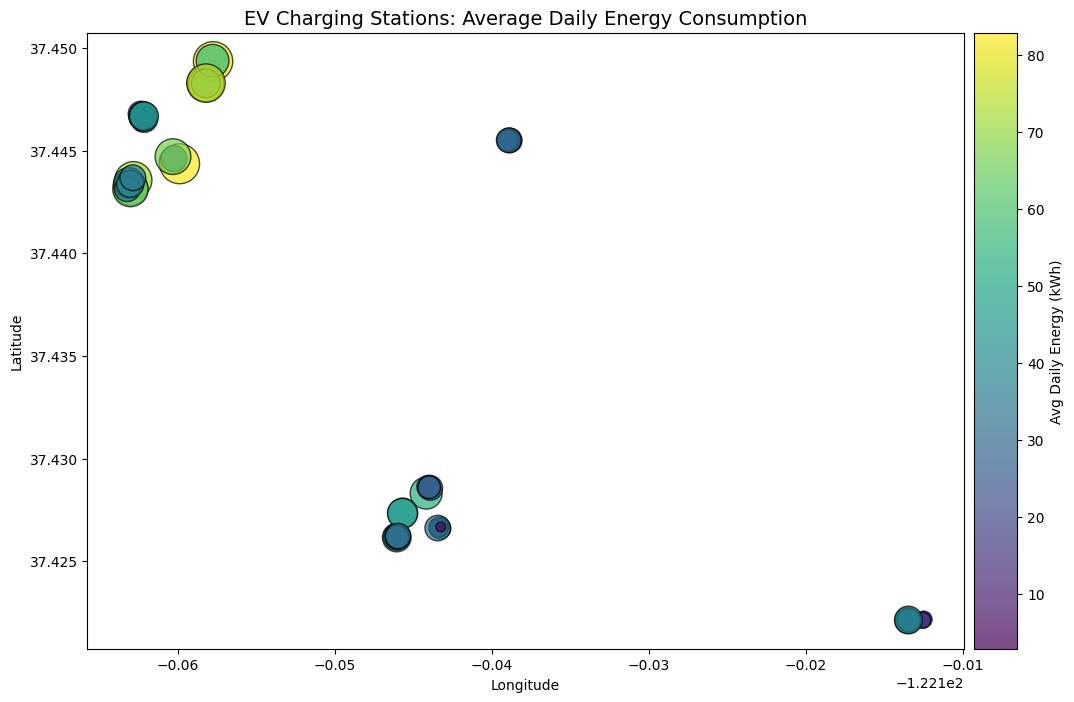

In [60]:
# Extract relevant data for plotting
bubble_data = station_avg_energy_standardized.copy()

# Plotting the bubble map
fig, ax = plt.subplots(figsize=(12, 8))
#world.
plt.plot(ax=ax, color='lightgrey', edgecolor='black')

# Adding the bubble plot
bubble = ax.scatter(
    bubble_data['Longitude'], bubble_data['Latitude'],
    s=bubble_data['Avg Daily Energy (kWh)'] * 10,  # Scale bubble size
    c=bubble_data['Avg Daily Energy (kWh)'], cmap='viridis', alpha=0.7, edgecolor='k'
)

# Color bar for energy levels
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(bubble, cax=cax, label='Avg Daily Energy (kWh)')

# Titles and labels
ax.set_title('EV Charging Stations: Average Daily Energy Consumption', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

It can be seen from the plot that the stations with the highest energy consumption are located in the center of Palo Alto (top left corner). 

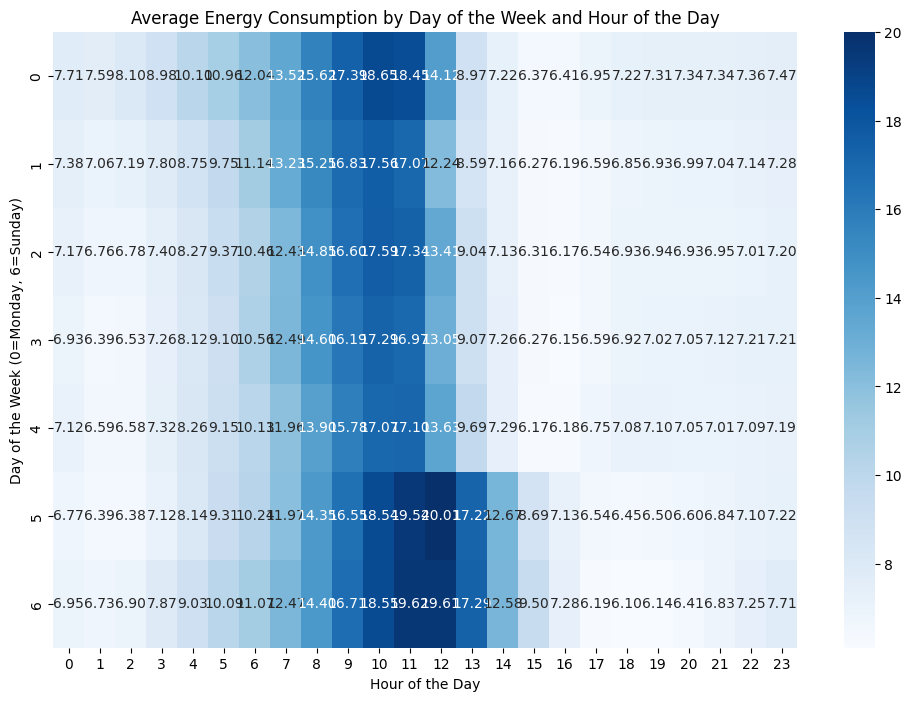

In [61]:
# Average Energy Consumption Heatmap by Day of the Week and Hour of the Day
plt.figure(figsize=(12, 8))
pivot_energy = hourly_data.pivot_table(values='Energy (kWh)', index='Day of week', columns='Hour of day', aggfunc='mean')
sns.heatmap(pivot_energy, cmap='Blues', annot=True, fmt=".2f")
plt.title('Average Energy Consumption by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')
plt.show()

Energy consumption shows disctinct patters from weekdays vs weekends. The highest consumption for both weekdays and weekends are located in the time range from approximatly 7:00 to 14:00.

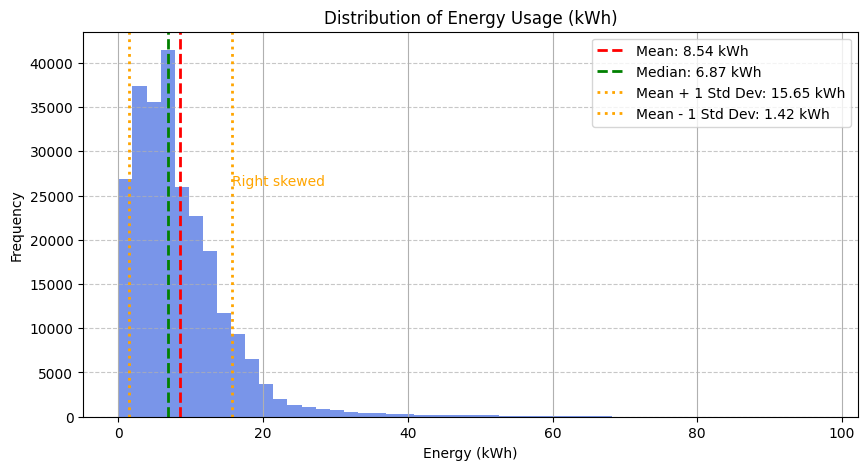

In [62]:
# Histogram of Energy Usage across stations

# Define the number of bins based on data range and spread
plt.figure(figsize=(10, 5))
energy_data = data['Energy (kWh)']

# Plot the histogram
energy_data.hist(bins=50, color='royalblue', alpha=0.7)
plt.title('Distribution of Energy Usage (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')

# Add lines for statistical context
mean_energy = energy_data.mean()
median_energy = energy_data.median()
std_energy = energy_data.std()

# Plot lines for mean, median, and std deviation
plt.axvline(mean_energy, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_energy:.2f} kWh')
plt.axvline(median_energy, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_energy:.2f} kWh')
plt.axvline(mean_energy + std_energy, color='orange', linestyle='dotted', linewidth=2, label=f'Mean + 1 Std Dev: {(mean_energy + std_energy):.2f} kWh')
plt.axvline(mean_energy - std_energy, color='orange', linestyle='dotted', linewidth=2, label=f'Mean - 1 Std Dev: {(mean_energy - std_energy):.2f} kWh')

# Annotate the skewness
plt.text(mean_energy + std_energy, plt.ylim()[1] * 0.6, 'Right skewed', color='orange', fontsize=10)

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

Energy usage is right or positive skewed, with a few stations consuming significantly more energy than the rest. This is expected, as some stations are more popular and have higher demand.

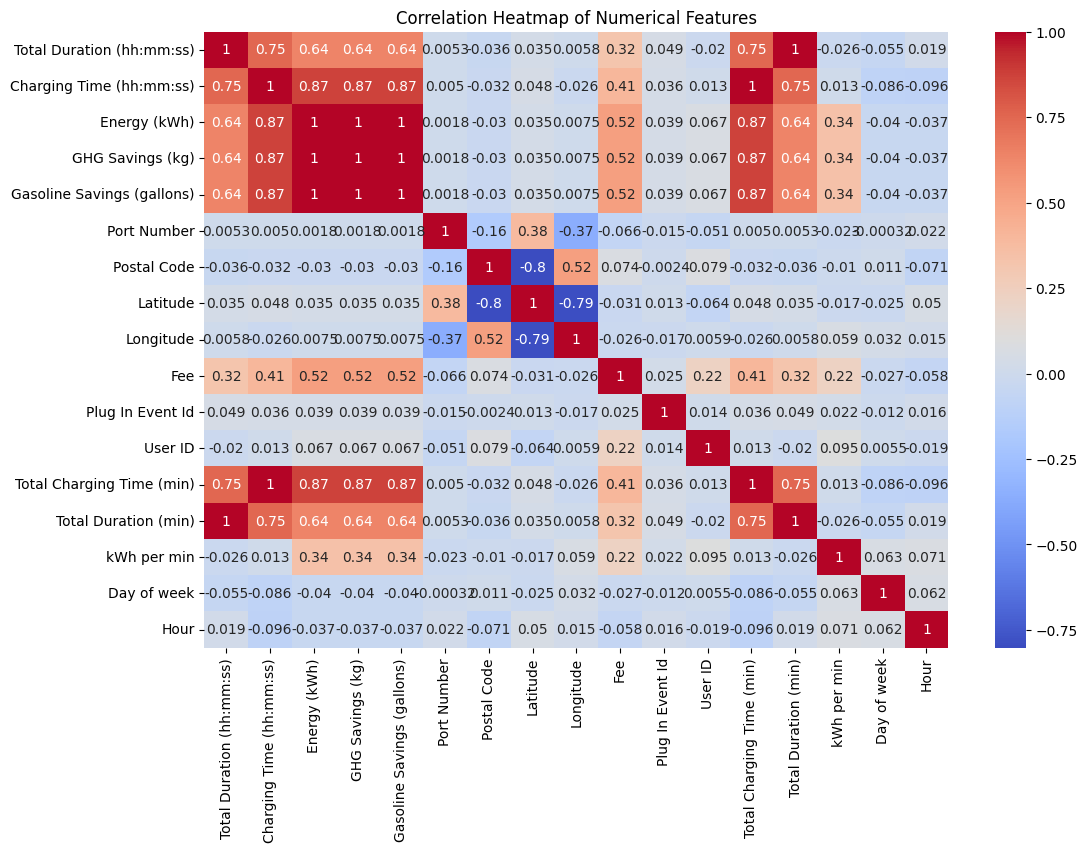

In [63]:
# Correlation Heatmap for numerical features
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Clustering the users**

To identify the target audience of the user base in order to provide recommendations for the company, we will cluster the users based on their charging behavior.

In order to obtain an initial understanding of the usage patterns, we will first visualize the distribution of the total duration, charging time and energy consumption per session to manually group the users into categories. Firstly a subset of the data will be created, based on relevant columns e.g. if it is weekend or not (_Weekend/Weekday_) and if it is day or night (_Day/Night_).

In [64]:
encoder = LabelEncoder()
data['Station Name'] = encoder.fit_transform(data['Station Name'])
data['Weekend/Weekday'] = encoder.fit_transform(data['Weekend/Weekday'])
data['Day/Night'] = encoder.fit_transform(data['Day/Night'])

Since each user can have multiple charging sessions, we will aggregate the data to get the total duration, charging time and energy consumption per user and use the most frequently used station in order to represent the user.

In [65]:
# Group hourly data by User ID, Station Name, Weekend/Weekday, and Day/Night
user_data = data.groupby('User ID').agg({
    'Total Duration (hh:mm:ss)': lambda x: pd.to_timedelta(x).mean().total_seconds() / 3600,  # Total hours
    'Charging Time (hh:mm:ss)': lambda x: pd.to_timedelta(x).mean().total_seconds() / 3600,  # Average charging time in hours
    'kWh per min': 'mean',  # Average kWh per min 
    'Longitude': 'mean',  # Average longitude
    'Latitude': 'mean',  # Average latitude
})

user_data.reset_index(inplace=True)

user_data['Most used station'] = data[['Station Name']].mode(axis=1)[0]
user_data['Weekend/Weekday'] = data[['Weekend/Weekday']].mode(axis=1)[0]
user_data['Day/Night'] = data[['Day/Night']].mode(axis=1)[0]
user_data.dropna(inplace=True)
user_data

User ID  Total Duration (hh:mm:ss)  Charging Time (hh:mm:ss)  \
0             0                   2.731395                  1.903909   
1           102                   2.729306                  2.724583   
2           107                   1.640631                  1.403712   
3           111                   2.275161                  1.668655   
4           140                   2.069861                  2.021458   
...         ...                        ...                       ...   
21337  23065631                   0.729444                  0.725000   
21338  23082221                   0.474444                  0.436111   
21339  23099981                   0.519167                  0.508611   
21340  23127081                   1.152778                  0.885833   
21341  23137801                   4.888333                  4.871111   

       kWh per min   Longitude   Latitude  Most used station  Weekend/Weekday  \
0         0.060185 -122.158402  37.444537               12.0              0.0   
1         0.054836 -122.162510  37.445093               12.0              1.0   
2         0.054267 -122.161620  37.445017               12.0              1.0   
3         0.059219 -122.161334  37.445580               12.0              1.0   
4         0.020513 -122.162552  37.445119               12.0              1.0   
...            ...         ...        ...                ...              ...   
21337     0.101172 -122.163139  37.443443                1.0              0.0   
21338     0.099707 -122.113510  37.422104               12.0              0.0   
21339     0.099192 -122.146034  37.426178                2.0              0.0   
21340     0.094525 -122.162369  37.446785               13.0              0.0   
21341     0.102489 -122.113441  37.422131               17.0              0.0   

       Day/Night  
0            1.0  
1            1.0  
2            0.0  
3            0.0  
4            1.0  
...          ...  
21337        0.0  
21338        0.0  
21339        0.0  
21340        0.0  
21341        0.0  

[19101 rows x 9 columns]

In [66]:
user_data.dropna(inplace=True)

In [67]:
# Normalize the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(user_data[['Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'kWh per min']])

#### Visualizing the distributions of the total duration, charging time and energy consumption per session

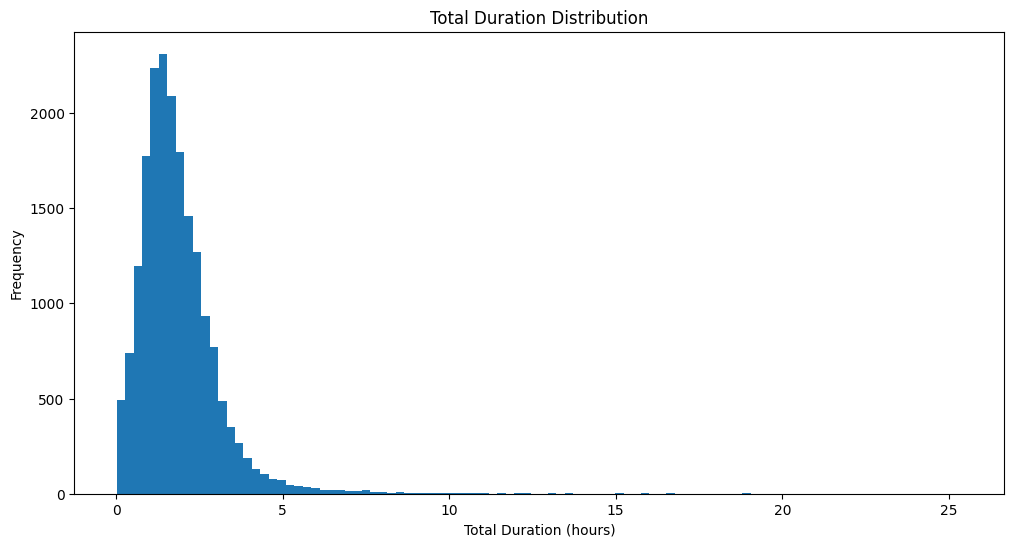

Total Duration:
Minimum: 0.017222222222222222
Maximum: 25.399166666666666
Mean: 1.8585507440915106


In [68]:
#Inspecting the distrubution of total duration and min/max and mean values
user_data['Total Duration (hh:mm:ss)'].hist(bins=100, figsize=(12, 6))
plt.title('Total Duration Distribution')
plt.xlabel('Total Duration (hours)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#min/max and mean values
print('Total Duration:')
print(f"Minimum: {user_data['Total Duration (hh:mm:ss)'].min()}")
print(f"Maximum: {user_data['Total Duration (hh:mm:ss)'].max()}")
print(f"Mean: {user_data['Total Duration (hh:mm:ss)'].mean()}")

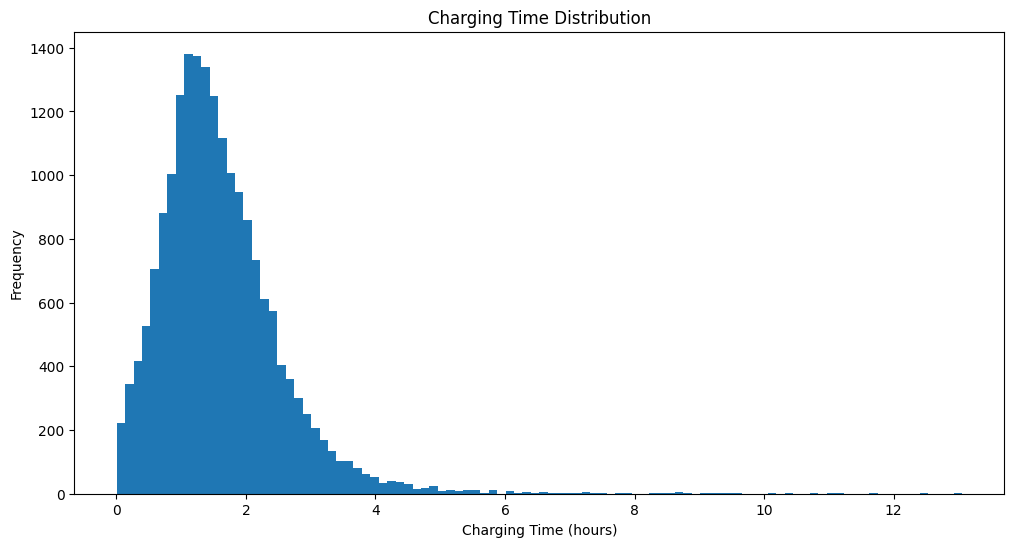

Charging Time:
Minimum: 0.004166666666666667
Maximum: 13.056666666666667
Mean: 1.5998071457773588


In [69]:
#Inspecting the distrubution of total duration and min/max and mean values
user_data['Charging Time (hh:mm:ss)'].hist(bins=100, figsize=(12, 6))
plt.title('Charging Time Distribution')
plt.xlabel('Charging Time (hours)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#min/max and mean values
print('Charging Time:')
print(f"Minimum: {user_data['Charging Time (hh:mm:ss)'].min()}")
print(f"Maximum: {user_data['Charging Time (hh:mm:ss)'].max()}")
print(f"Mean: {user_data['Charging Time (hh:mm:ss)'].mean()}")

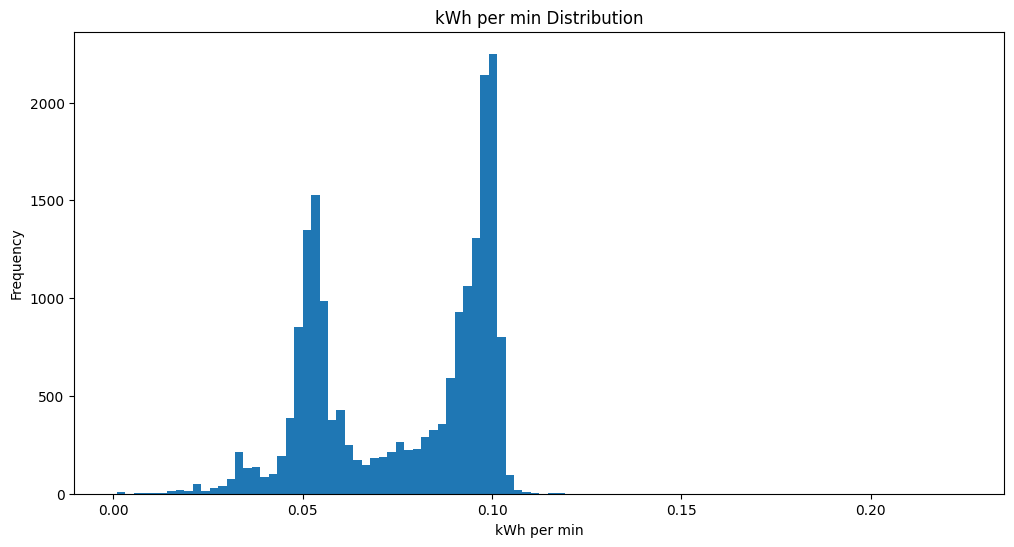

kWh per min:
Minimum: 0.000875187969924812
Maximum: 0.22411080485146384
Mean: 0.0765818857649196


In [70]:
#Inspecting the distrubution of total duration and min/max and mean values
user_data['kWh per min'].hist(bins=100, figsize=(12, 6))
plt.title('kWh per min Distribution')
plt.xlabel('kWh per min')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#min/max and mean values
print('kWh per min:')
print(f"Minimum: {user_data['kWh per min'].min()}")
print(f"Maximum: {user_data['kWh per min'].max()}")
print(f"Mean: {user_data['kWh per min'].mean()}")

As mentioned, energy usage is positively skewed, e.i some users consume significantly more energy than others - to take this into account, clusterings will be based on mean values of the total duration, charging time and energy consumption per session.

**Based on energy consumption:**

In [71]:
energy_con = user_data.copy()
ClusterList = np.ones(energy_con.shape[0])

for i in range(energy_con.shape[0]):
    if energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # High and night and weekend
        ClusterList[i] = 8
    elif energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 0 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # High and day and weekend
        ClusterList[i] = 7
    elif energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 0: # High and night and weekday
        ClusterList[i] = 6
    elif energy_con.iloc[i]['kWh per min'] > 0.076 and energy_con.iloc[i]['Day/Night'] == 0 and energy_con.iloc[i]['Weekend/Weekday'] == 0: # High and day and weekday
        ClusterList[i] = 5
    elif energy_con.iloc[i]['kWh per min'] <= 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # Low and night and weekend
        ClusterList[i] = 4
    elif energy_con.iloc[i]['kWh per min'] <= 0.076 and energy_con.iloc[i]['Day/Night'] == 0 and energy_con.iloc[i]['Weekend/Weekday'] == 1: # Low and day and weekend
        ClusterList[i] = 3
    elif energy_con.iloc[i]['kWh per min'] <= 0.076 and energy_con.iloc[i]['Day/Night'] == 1 and energy_con.iloc[i]['Weekend/Weekday'] == 0: # Low and night and weekday
        ClusterList[i] = 2
    else:
        ClusterList[i] = 1

energy_con['Energy group'] = ClusterList

print(energy_con[['kWh per min', 'Energy group']].head())
print(energy_con['Energy group'].value_counts())

   kWh per min  Energy group
0     0.060185           2.0
1     0.054836           4.0
2     0.054267           3.0
3     0.059219           3.0
4     0.020513           4.0
Energy group
5.0    6459
1.0    4997
6.0    1901
7.0    1794
2.0    1575
3.0    1273
8.0     601
4.0     501
Name: count, dtype: int64


**Based on charging time:**

In [72]:
charging_times = user_data.copy()
ClusterList = np.ones(charging_times.shape[0])

for i in range(charging_times.shape[0]):
    if charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 8
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 0 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 7
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 6
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] > 1.59 and charging_times.iloc[i]['Day/Night'] == 0 and charging_times.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 5
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] <= 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 4
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] <= 1.59 and charging_times.iloc[i]['Day/Night'] == 0 and charging_times.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 3
    elif charging_times.iloc[i]['Charging Time (hh:mm:ss)'] <= 1.59 and charging_times.iloc[i]['Day/Night'] == 1 and charging_times.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 2
    else:
        ClusterList[i] = 1

charging_times['Charging group'] = ClusterList

print(charging_times[['Charging Time (hh:mm:ss)', 'Charging group']].head())
print(charging_times['Charging group'].value_counts())

   Charging Time (hh:mm:ss)  Charging group
0                  1.903909             6.0
1                  2.724583             8.0
2                  1.403712             3.0
3                  1.668655             7.0
4                  2.021458             8.0
Charging group
1.0    6517
5.0    4939
2.0    1963
3.0    1746
6.0    1513
7.0    1321
4.0     632
8.0     470
Name: count, dtype: int64


**Based on total duration:**

In [73]:
total_duration = user_data.copy()
ClusterList = np.ones(total_duration.shape[0])

for i in range(total_duration.shape[0]):
    if total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 8
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 0 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 7
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 6
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] > 1.859 and total_duration.iloc[i]['Day/Night'] == 0 and total_duration.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 5
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] <= 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 4
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] <= 1.859 and total_duration.iloc[i]['Day/Night'] == 0 and total_duration.iloc[i]['Weekend/Weekday'] == 1:
        ClusterList[i] = 3
    elif total_duration.iloc[i]['Total Duration (hh:mm:ss)'] <= 1.859 and total_duration.iloc[i]['Day/Night'] == 1 and total_duration.iloc[i]['Weekend/Weekday'] == 0:
        ClusterList[i] = 2
    else:
        ClusterList[i] = 1

total_duration['Duration group'] = ClusterList

print(total_duration[['Total Duration (hh:mm:ss)', 'Duration group']].head())
print(total_duration['Duration group'].value_counts())

   Total Duration (hh:mm:ss)  Duration group
0                   2.731395             6.0
1                   2.729306             8.0
2                   1.640631             3.0
3                   2.275161             7.0
4                   2.069861             8.0
Duration group
1.0    6748
5.0    4708
2.0    2060
3.0    1856
6.0    1416
7.0    1211
4.0     635
8.0     467
Name: count, dtype: int64


**What are the characteristics of each cluster?**

In [74]:
#Average values for each cluster
average2 = pd.concat([total_duration.groupby('Duration group').mean()['Total Duration (hh:mm:ss)'],
                        charging_times.groupby('Charging group').mean()['Charging Time (hh:mm:ss)'],
                        energy_con.groupby('Energy group').mean()['kWh per min']], axis=1)

average2.columns = ['Avg Total Duration', 'Avg Charging Time', 'Avg kWh per min']
average2

Avg Total Duration  Avg Charging Time  Avg kWh per min
1.0            1.146859           0.994859         0.053170
2.0            1.150492           1.001336         0.052929
3.0            1.149943           1.000950         0.052491
4.0            1.154160           1.019758         0.052322
5.0            2.882387           2.388013         0.094819
6.0            2.894841           2.373512         0.095018
7.0            2.945137           2.427170         0.095055
8.0            2.758110           2.393275         0.095027

In [75]:
def get_cluster_stats(data, group_column, cluster_column='Cluster'):
    cluster_stats = [] 
    unique_clusters = data[group_column].unique()

    for cluster in unique_clusters:
        cluster_data = data[data[group_column] == cluster]
        station_counts = cluster_data['Most used station'].unique()  # Unique stations
        mean_longitude = cluster_data['Longitude'].mean()  # Mean longitude
        mean_latitude = cluster_data['Latitude'].mean()    # Mean latitude
        count = len(cluster_data)

        cluster_stats.append({
            cluster_column: cluster,
            'Count': count,
            'Top Stations': station_counts,
            'Mean Longitude': mean_longitude,
            'Mean Latitude': mean_latitude
            
        })

    # Convert to DataFrame
    cluster_stats_df = pd.DataFrame(cluster_stats)
    cluster_stats_df = cluster_stats_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return cluster_stats_df

In [76]:
get_cluster_stats(energy_con, 'Energy group')

Cluster  Count                  Top Stations  Mean Longitude  Mean Latitude
0      5.0   6459  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.153035      37.440154
1      1.0   4997  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153522      37.440094
2      6.0   1901  [12.0, 13.0, 2.0, 1.0, 17.0]     -122.152563      37.440092
3      7.0   1794  [12.0, 13.0, 17.0, 1.0, 2.0]     -122.152773      37.440142
4      2.0   1575  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153898      37.440277
5      3.0   1273  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153700      37.440121
6      8.0    601  [13.0, 12.0, 1.0, 2.0, 17.0]     -122.153526      37.440257
7      4.0    501  [12.0, 13.0, 2.0, 17.0, 1.0]     -122.154244      37.440243

In [77]:
get_cluster_stats(total_duration, 'Duration group')

Cluster  Count                  Top Stations  Mean Longitude  Mean Latitude
0      1.0   6748  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.152445      37.439419
1      5.0   4708  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.154397      37.441144
2      2.0   2060  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.152439      37.439631
3      3.0   1856  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.152253      37.439329
4      6.0   1416  [12.0, 13.0, 17.0, 1.0, 2.0]     -122.154228      37.440969
5      7.0   1211  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.154546      37.441366
6      4.0    635  [13.0, 12.0, 2.0, 17.0, 1.0]     -122.152946      37.439544
7      8.0    467  [12.0, 13.0, 2.0, 1.0, 17.0]     -122.155085      37.441212

In [78]:
get_cluster_stats(charging_times, 'Charging group')

Cluster  Count                  Top Stations  Mean Longitude  Mean Latitude
0      1.0   6517  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.152483      37.439445
1      5.0   4939  [13.0, 12.0, 17.0, 2.0, 1.0]     -122.154256      37.441028
2      2.0   1963  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.152566      37.439672
3      3.0   1746  [12.0, 13.0, 17.0, 1.0, 2.0]     -122.152155      37.439295
4      6.0   1513  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.153948      37.440831
5      7.0   1321  [12.0, 13.0, 17.0, 2.0, 1.0]     -122.154483      37.441241
6      4.0    632  [12.0, 13.0, 2.0, 17.0, 1.0]     -122.153213      37.439710
7      8.0    470  [12.0, 13.0, 2.0, 1.0, 17.0]     -122.154712      37.440977

For both total duration and charging time the pattern of most frequent clusters is the same, and looks as follows, but the order of clusters is different for energy consumption:
| **Weekend/Weekday** | **Day/Night** | **Total duration** | **Charging time** | **Energy consumption** |
|-------------|---------------|---------------------|-------------------|------------------------|
| Weekday     | Day           | Short              | Short             | High                   |
| Weekday     | Day           | Long               | Long              | Low                    |
| Weekday     | Night         | Short              | Short             | High                   |
| Weekend     | Day           | Short              | Short             | High                   |
| Weekday     | Night         | Long               | Long              | Low                    |
| Weekend     | Day           | Long               | Long              | Low                    |
| Weekend     | Night         | Short              | Short             | High                   |
| Weekend     | Night         | Long               | Long              | Low                    |

The largest segment of users will have have a low charging time and total duration during daytime on weekdays, but will in the span consume a high amount of energy. The second largest segment of users will have long charging time and total duration during daytime on weekdays, but will in the span consume a low amount of energy. The smallest segment will charge for a large amount of time during nighttime on weekends, and will consume a low amount of energy. This makes sense as most people will charge their cars during the day on weekdays, when they are needed, and less people will charge their cars during the night on weekends. This pattern of more charging time during weekdays compared to weekends, also makes sense considering that there are more workdays than weekends and correlates with plot for average daily energy consumption.

In addtion the most frequently used stations are located in the center of Palo Alto, which is also where the stations with the highest energy consumption are located, as mentioned earlier.


#### **Applying K-means clustering**

In [79]:
d = data.set_index('Start Date')

d['date'] = d.index.date
d['hour'] = d.index.hour

hourly_energy = d.groupby(['User ID', 'date', 'hour'])['Energy (kWh)'].mean().reset_index()

# Pivot table: Rows -> User ID, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(index='User ID', columns='hour', values='Energy (kWh)', fill_value=0)
user_hourly

hour       0    1    2    3    4    5         6         7         8   \
User ID                                                                
0         0.0  0.0  0.0  0.0  0.0  0.0  9.336415  1.789365  7.991930   
102       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
107       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
111       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  5.576771   
140       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
...       ...  ...  ...  ...  ...  ...       ...       ...       ...   
23065631  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23082221  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23099981  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23127081  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23137801  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

hour            9   ...         14        15        16        17        18  \
User ID             ...                                                      
0         7.619794  ...   5.232785  6.005633  3.764527  7.163774  6.322067   
102       0.000000  ...   0.000000  8.742773  0.000000  0.000000  0.000000   
107       3.874572  ...   0.952530  0.000000  0.000000  0.000000  9.742033   
111       4.950762  ...   3.471362  0.000000  4.180450  5.398313  6.652872   
140       0.000000  ...   0.000000  0.000000  3.225248  0.000000  1.490083   
...            ...  ...        ...       ...       ...       ...       ...   
23065631  0.000000  ...   4.401000  0.000000  0.000000  0.000000  0.000000   
23082221  0.000000  ...   2.609000  0.000000  0.000000  0.000000  0.000000   
23099981  0.000000  ...   0.000000  0.000000  3.027000  0.000000  0.000000   
23127081  0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
23137801  0.000000  ...  29.954000  0.000000  0.000000  0.000000  0.000000   

hour             19        20         21        22         23  
User ID                                                        
0          7.636356  6.919396  10.466557  8.599602  18.527712  
102        0.000000  0.000000   0.000000  0.000000   0.000000  
107        9.713000  0.000000   0.000000  0.000000   0.000000  
111       15.501220  0.000000   0.000000  0.000000   0.000000  
140        0.000000  0.000000   0.000000  0.000000   0.000000  
...             ...       ...        ...       ...        ...  
23065631   0.000000  0.000000   0.000000  0.000000   0.000000  
23082221   0.000000  0.000000   0.000000  0.000000   0.000000  
23099981   0.000000  0.000000   0.000000  0.000000   0.000000  
23127081   0.000000  0.000000   0.000000  0.000000   0.000000  
23137801   0.000000  0.000000   0.000000  0.000000   0.000000  

[21342 rows x 24 columns]

In [80]:
user_hourly.columns = [f"{col}" for col in user_hourly.columns]
user_hourly

0    1    2    3    4    5         6         7         8  \
User ID                                                                
0         0.0  0.0  0.0  0.0  0.0  0.0  9.336415  1.789365  7.991930   
102       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
107       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
111       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  5.576771   
140       0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
...       ...  ...  ...  ...  ...  ...       ...       ...       ...   
23065631  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23082221  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23099981  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23127081  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
23137801  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

                 9  ...         14        15        16        17        18  \
User ID             ...                                                      
0         7.619794  ...   5.232785  6.005633  3.764527  7.163774  6.322067   
102       0.000000  ...   0.000000  8.742773  0.000000  0.000000  0.000000   
107       3.874572  ...   0.952530  0.000000  0.000000  0.000000  9.742033   
111       4.950762  ...   3.471362  0.000000  4.180450  5.398313  6.652872   
140       0.000000  ...   0.000000  0.000000  3.225248  0.000000  1.490083   
...            ...  ...        ...       ...       ...       ...       ...   
23065631  0.000000  ...   4.401000  0.000000  0.000000  0.000000  0.000000   
23082221  0.000000  ...   2.609000  0.000000  0.000000  0.000000  0.000000   
23099981  0.000000  ...   0.000000  0.000000  3.027000  0.000000  0.000000   
23127081  0.000000  ...   0.000000  0.000000  0.000000  0.000000  0.000000   
23137801  0.000000  ...  29.954000  0.000000  0.000000  0.000000  0.000000   

                 19        20         21        22         23  
User ID                                                        
0          7.636356  6.919396  10.466557  8.599602  18.527712  
102        0.000000  0.000000   0.000000  0.000000   0.000000  
107        9.713000  0.000000   0.000000  0.000000   0.000000  
111       15.501220  0.000000   0.000000  0.000000   0.000000  
140        0.000000  0.000000   0.000000  0.000000   0.000000  
...             ...       ...        ...       ...        ...  
23065631   0.000000  0.000000   0.000000  0.000000   0.000000  
23082221   0.000000  0.000000   0.000000  0.000000   0.000000  
23099981   0.000000  0.000000   0.000000  0.000000   0.000000  
23127081   0.000000  0.000000   0.000000  0.000000   0.000000  
23137801   0.000000  0.000000   0.000000  0.000000   0.000000  

[21342 rows x 24 columns]

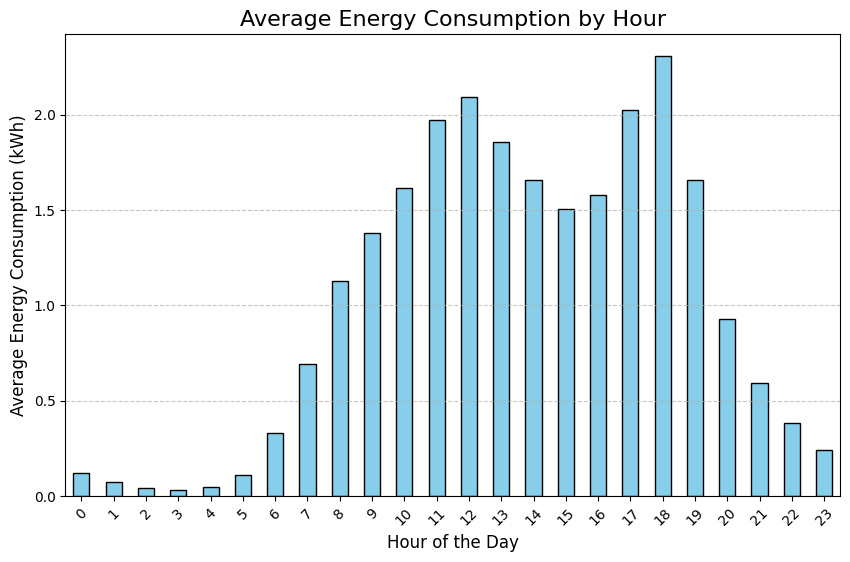

In [81]:
# Plot average energy consumption by hour
hourly_avg_energy = user_hourly.mean(axis=0)

plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

We normalize the data, and apply the K-means algorithm.

In [82]:
scaler = MinMaxScaler()
normalized_user_hourly = scaler.fit_transform(user_hourly)

# Convert back to DataFrame
normalized_user_hourly = pd.DataFrame(normalized_user_hourly, 
                                       index=user_hourly.index, 
                                       columns=user_hourly.columns)

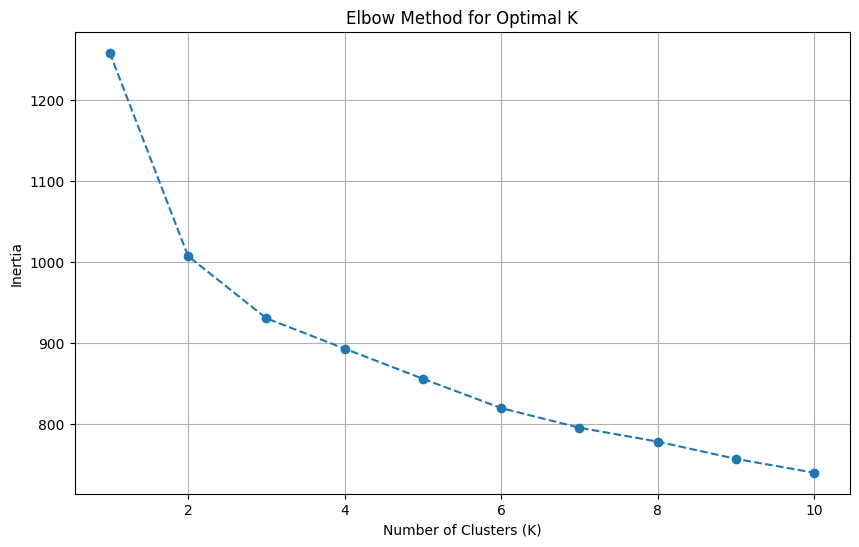

In [83]:
# Elbow Method for Determining Optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_user_hourly)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [84]:
# Apply KMeans Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_user_hourly)

# Add cluster labels to the user usage pivot table
user_hourly['Cluster'] = clusters

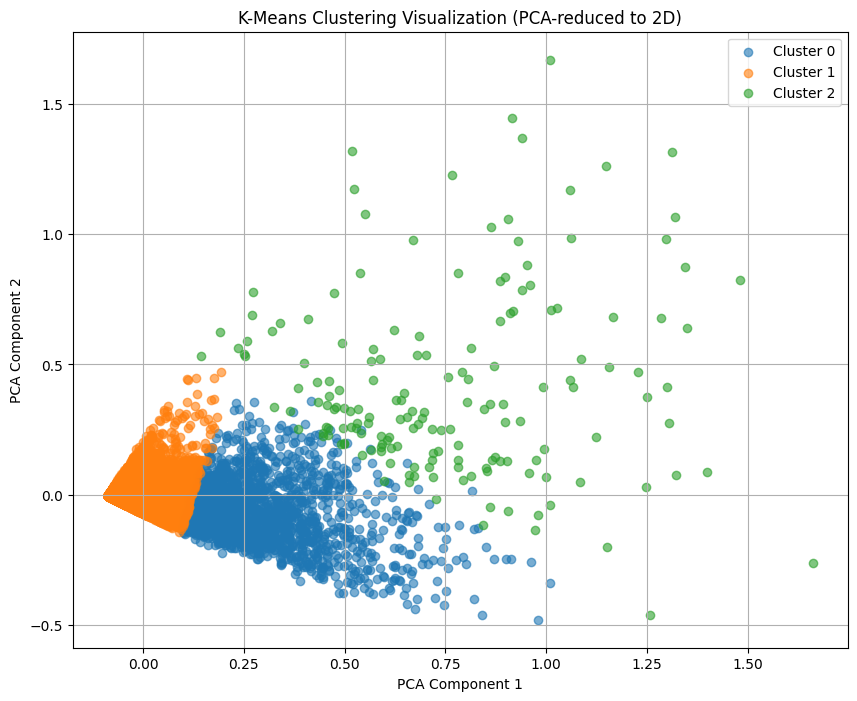

In [85]:
# Plot cluster visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_user_hourly)

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_points = reduced_data[user_hourly['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

In [86]:
# Silhouette Score for Evaluating Clustering Quality
silhouette_avg = silhouette_score(normalized_user_hourly, clusters)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg}")

Silhouette Score for K=3: 0.5264848582026027


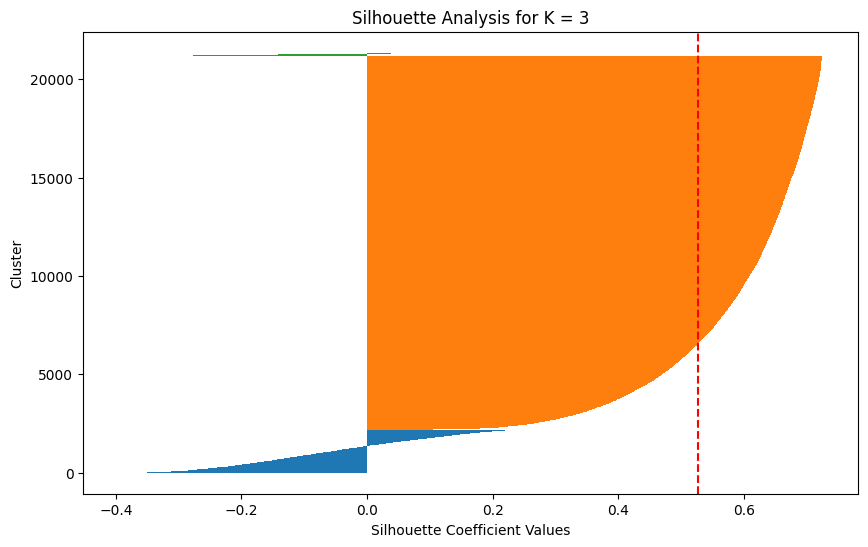

In [87]:
silhouette_vals = silhouette_samples(normalized_user_hourly, clusters)
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.title(f"Silhouette Analysis for K = {optimal_k}")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.show()

The silhouette score plot reveals that some clusters are poorly defined, potentially due to the dominance of a single, overly represented cluster.

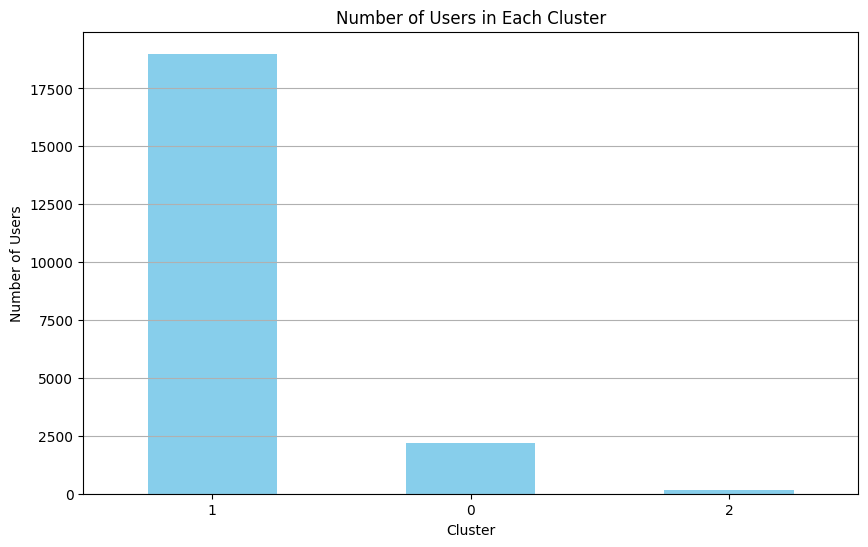

In [88]:
# Plot: Cluster Size Distribution
cluster_counts = user_hourly['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

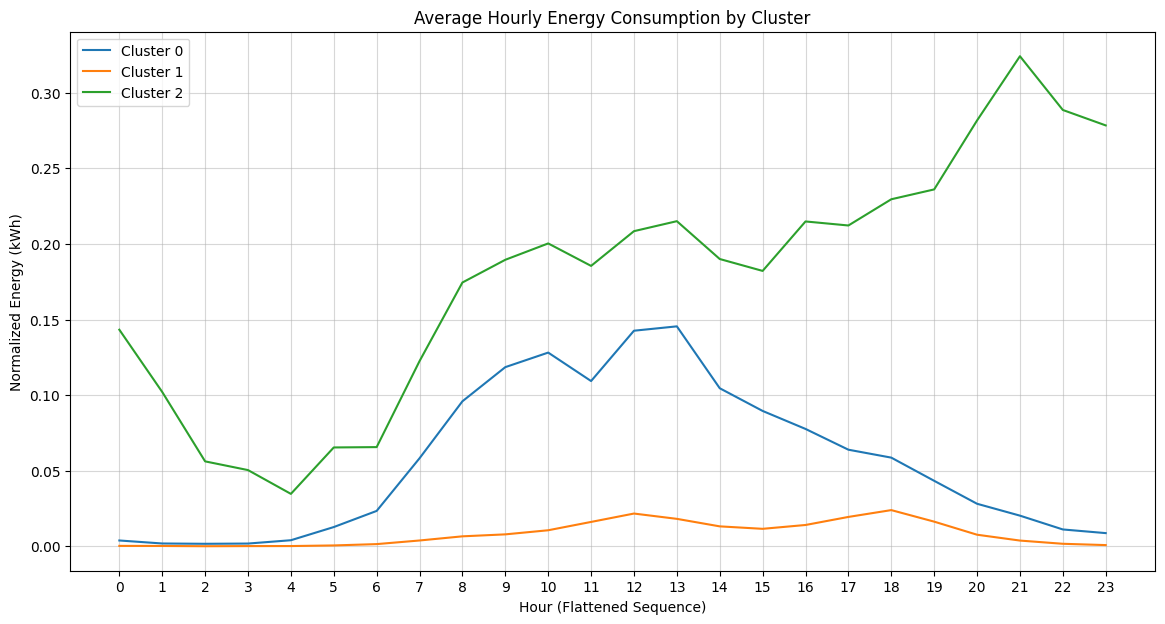

In [89]:
cluster_hourly_avg = normalized_user_hourly.groupby(user_hourly['Cluster']).mean()

# Plot the average usage patterns per cluster
plt.figure(figsize=(14, 7))
for cluster_id in cluster_hourly_avg.index:
    plt.plot(cluster_hourly_avg.columns, cluster_hourly_avg.loc[cluster_id], label=f"Cluster {cluster_id}")

plt.legend()
plt.title("Average Hourly Energy Consumption by Cluster")
plt.xlabel("Hour (Flattened Sequence)")
plt.ylabel("Normalized Energy (kWh)")
plt.grid(alpha=0.5)
plt.show()

Looking at the plot, the users behavior can be divided into 3 clusters:

- Cluster 0 has a high energy consumption around 8:00 - 15:00.
- Cluster 1 has low energy consumption with small peaks at 13:00 and 19:00.
- Cluster 2 has a generel high energy consumption specially at the evening.

Most users fit into cluster 1, which is characterized by low energy consumption. Both cluster 0 and 2 have high energy consumption at around 11:00 and 14:00. These insights can be used to target marketing efforts and improve station efficiency. It should be noted that the clusters are not evenly distributed, with cluster 1 being the most common, contributing to an overlap in the clusters, as reflected by a silhoutte score of $0.526$.

### **2: Prediction model**

In this section, we create a prediction model using three different models, based on Stations Name, which is split into hourly intervals, summarizing energy usage and generating features like historical averages, time of day, and lag features. We evaluate the model using training, validation, and test datasets to assess performance.

In [90]:
# Function to split charging events into hourly intervals
def split_events_hourly(data):
    expanded_data = []
    for _, row in data.iterrows():
        start_time = row['Start Date UTC']
        end_time = row['End Date UTC']
        current_time = start_time.floor('H')

        while current_time < end_time:
            next_hour = min(current_time + pd.Timedelta(hours=1), end_time)
            overlap_seconds = (next_hour - current_time).total_seconds()
            overlap_fraction = overlap_seconds / 3600  # Fraction of the hour
            
            expanded_data.append({
                'Hour': current_time,
                'Station Name': row['Station Name'],
                'User ID': row['User ID'],
                'Energy (kWh)': overlap_fraction * row['Energy (kWh)'],  # Proportion of energy for this hour
                'Overlap (min)': overlap_seconds / 60  # Overlap in minutes
            })
            current_time += pd.Timedelta(hours=1)

    return pd.DataFrame(expanded_data)

In [91]:
# Convert Start Date and End Date to datetime
data['Start Date UTC'] = pd.to_datetime(data['Start Date UTC'])
data['End Date UTC'] = pd.to_datetime(data['End Date UTC'])

# Apply the splitting function
hourly_data = split_events_hourly(data)

# Check hourly data
print(hourly_data.head())

                       Hour  Station Name  User ID  Energy (kWh)  \
0 2011-07-30 03:00:00+00:00            12     3284      6.249457   
1 2011-07-30 04:00:00+00:00            12     3284      6.249457   
2 2011-07-30 05:00:00+00:00            12     3284      6.249457   
3 2011-07-30 06:00:00+00:00            12     3284      2.083152   
4 2011-07-30 07:00:00+00:00            12     4169      0.003553   

   Overlap (min)  
0           60.0  
1           60.0  
2           60.0  
3           20.0  
4            2.0  


In [92]:
# Aggregate energy usage per station and hour
combined_data = hourly_data.groupby(['Hour', 'Station Name'], as_index=False).agg({
    'Energy (kWh)': 'sum'
})

# Add Day of Week
combined_data['Day of Week'] = combined_data['Hour'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Add Time of Day
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

combined_data['Time of Day'] = combined_data['Hour'].dt.hour.apply(time_of_day)

# Add Historical Average Energy Usage
combined_data['Historical Avg (kWh)'] = combined_data.groupby(
    ['Station Name', combined_data['Hour'].dt.hour]
)['Energy (kWh)'].transform('mean')

# Add Lag Features
combined_data['Energy Lag 1'] = combined_data.groupby('Station Name')['Energy (kWh)'].shift(1)
combined_data['Energy Lag 24'] = combined_data.groupby('Station Name')['Energy (kWh)'].shift(24)

# Add Rolling Statistics
combined_data['Rolling Mean 3h'] = combined_data.groupby('Station Name')['Energy (kWh)'].transform(
    lambda x: x.rolling(3).mean()
)

# Fill NaNs resulting from lag/rolling
combined_data.fillna(0, inplace=True)

# Check data with features
print(combined_data.head())

# Sort by time to prevent data leakage
combined_data = combined_data.sort_values('Hour')

                       Hour  Station Name  Energy (kWh)  Day of Week  \
0 2011-07-30 03:00:00+00:00            12      6.249457            5   
1 2011-07-30 04:00:00+00:00            12      6.249457            5   
2 2011-07-30 05:00:00+00:00            12      6.249457            5   
3 2011-07-30 06:00:00+00:00            12      2.083152            5   
4 2011-07-30 07:00:00+00:00            12      0.003553            5   

  Time of Day  Historical Avg (kWh)  Energy Lag 1  Energy Lag 24  \
0       Night              8.302988      0.000000            0.0   
1       Night              8.467789      6.249457            0.0   
2       Night              9.987614      6.249457            0.0   
3     Morning             12.847300      6.249457            0.0   
4     Morning             15.557943      2.083152            0.0   

   Rolling Mean 3h  
0         0.000000  
1         0.000000  
2         6.249457  
3         4.860689  
4         2.778721  


In [93]:
# Split into train (70%) and test (30%)
train_data, test_data = train_test_split(combined_data, test_size=0.3, random_state=42, shuffle=False)

# Split training data into train (80%) and validation (20%)
train_final, validation_train = train_test_split(train_data, test_size=0.2, random_state=42, shuffle=False)

# Split test data into test (50%) and validation-test (50%)
test_final, validation_test = train_test_split(test_data, test_size=0.5, random_state=42, shuffle=False)

# Print dataset sizes
print(f"Dataset Sizes:")
print(f"Train Final: {len(train_final)} ({len(train_final) / len(combined_data) * 100:.2f}%)")
print(f"Validation Train: {len(validation_train)} ({len(validation_train) / len(combined_data) * 100:.2f}%)")
print(f"Validation Test: {len(validation_test)} ({len(validation_test) / len(combined_data) * 100:.2f}%)")
print(f"Test Final: {len(test_final)} ({len(test_final) / len(combined_data) * 100:.2f}%)")

Dataset Sizes:
Train Final: 357016 (56.00%)
Validation Train: 89255 (14.00%)
Validation Test: 95630 (15.00%)
Test Final: 95629 (15.00%)


In [94]:
# Define features and target
X_features = ['Historical Avg (kWh)', 'Day of Week', 'Energy Lag 1', 'Energy Lag 24', 'Rolling Mean 3h']
y_target = 'Energy (kWh)'

X_train = train_final[X_features]
y_train = train_final[y_target]

X_validation = validation_train[X_features]
y_validation = validation_train[y_target]

X_test = test_final[X_features]
y_test = test_final[y_target]

We use Linear Regression as a baseline model, to predict energy usage, because it is simple and interpretable.

In [95]:
# Function to evaluate classification metrics for regression model
def evaluate_regression(y_true, y_pred, threshold=0.5):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

In [96]:
# Train Linear Regression Model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Predicion and evaluation
y_pred_validation = baseline_model.predict(X_validation)
evaluate_regression(y_validation, y_pred_validation, threshold=0.5)

y_pred_test = baseline_model.predict(X_test)
evaluate_regression(y_test, y_pred_test, threshold=0.5)

MSE: 23.91, MAE: 3.27, R²: 0.81
MSE: 29.97, MAE: 3.67, R²: 0.80


The MSE is 23.91 for the validation set and 29.97 for the test set, and the MAE is 3.27 and 3.67, respectively. These values indicate that the model has a reasonable prediction performance, with relatively low errors. The R² values of 0.81 and 0.80 suggest that the model explains about 81% and 80% of the variance in the data, showing a good fit.

We use a Random Forest model to predict energy consumption, as it performs well with complex, non-linear relationships.

In [98]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
# Predicion and evaluation
y_pred_rf = rf_model.predict(X_test)
evaluate_regression(y_test, y_pred_rf)

MSE: 27.67, MAE: 3.43, R²: 0.82


The MSE is 27.67, the MAE is 3.43, and the R² is 0.82, indicating good model performance. To improve it further, we use RandomizedSearchCV to optimize hyperparameters, exploring different combinations of estimators, depth, split criteria, and features through 3-fold cross-validation.

In [100]:
# Hyperparameter Tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled
    cv=3, # Number of folds in cross-validation
    n_jobs=1, # Number of jobs to run in parallel
    verbose=2, # Controls the verbosity
    random_state=42 # Random seed
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.0min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=

In [101]:
# Prediction and evaluation
y_pred_rf = random_search.best_estimator_.predict(X_test)
evaluate_regression(y_test, y_pred_rf)

MSE: 26.50, MAE: 3.41, R²: 0.83


By turning the hyperparameters, we see that the optimized model gives an MSE of 26.50, MAE of 3.41, and R² of 0.83. This indicates an improvement in model performance, with a slightly lower error and a better fit, explaining 83% of the variance in the data.

We use a Neural Network model to predict energy consumption, because they are highly effective at modeling complex, non-linear relationships between input features and the target variable.

In [102]:
# Build and Train Neural Network Model
def build_and_train_nn(X_train, y_train, X_validation, y_validation, X_test, y_test, epochs=50, batch_size=32, regularization_strength=0.001, use_dropout=True):
    nn_model = Sequential()
    
    # Add layers with L2 regularization to prevent overfitting and optional Dropout
    nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))
    if use_dropout:
        nn_model.add(Dropout(rate=0.5))
    
    nn_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))
    if use_dropout:
        nn_model.add(Dropout(rate=0.5))

    nn_model.add(Dense(1))  # Output layer

    # Compile the model with Adam optimizer and Mean Squared Error loss function
    nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train the model for 50 epocs with a batch size of 32 and evaluate on training and validation loss and Mean Absolute Error (MAE).
    history = nn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size, verbose=2)

    return nn_model, history

# Call the function to train and evaluate the Neural Network model
nn_model, history = build_and_train_nn(X_train, y_train, X_validation, y_validation, X_test, y_test, epochs=50, batch_size=32, regularization_strength=0.001)

Epoch 1/50
11157/11157 - 5s - 458us/step - loss: 28.9169 - mae: 3.6711 - val_loss: 24.0150 - val_mae: 3.5555
Epoch 2/50
11157/11157 - 4s - 392us/step - loss: 24.5540 - mae: 3.3398 - val_loss: 23.3700 - val_mae: 3.4781
Epoch 3/50
11157/11157 - 4s - 391us/step - loss: 23.2381 - mae: 3.2473 - val_loss: 22.9041 - val_mae: 3.3974
Epoch 4/50
11157/11157 - 4s - 389us/step - loss: 22.8031 - mae: 3.2195 - val_loss: 23.2388 - val_mae: 3.4317
Epoch 5/50
11157/11157 - 4s - 394us/step - loss: 22.5935 - mae: 3.2103 - val_loss: 22.9728 - val_mae: 3.3587
Epoch 6/50
11157/11157 - 4s - 387us/step - loss: 22.5123 - mae: 3.2091 - val_loss: 22.6972 - val_mae: 3.3656
Epoch 7/50
11157/11157 - 4s - 393us/step - loss: 22.5405 - mae: 3.2157 - val_loss: 22.7051 - val_mae: 3.4081
Epoch 8/50
11157/11157 - 4s - 401us/step - loss: 22.4467 - mae: 3.2142 - val_loss: 22.0103 - val_mae: 3.2442
Epoch 9/50
11157/11157 - 5s - 415us/step - loss: 22.3646 - mae: 3.2067 - val_loss: 23.0673 - val_mae: 3.4264
Epoch 10/50
11157/1

In [103]:
# Predicion and evaluation
y_pred_nn = nn_model.predict(X_test)
evaluate_regression(y_test, y_pred_nn)

2989/2989 ━━━━━━━━━━━━━━━━━━━━ 1s 232us/step
MSE: 27.20, MAE: 3.64, R²: 0.82


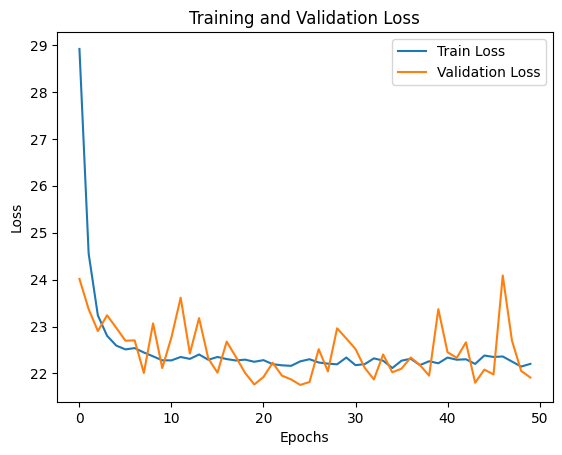

In [104]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

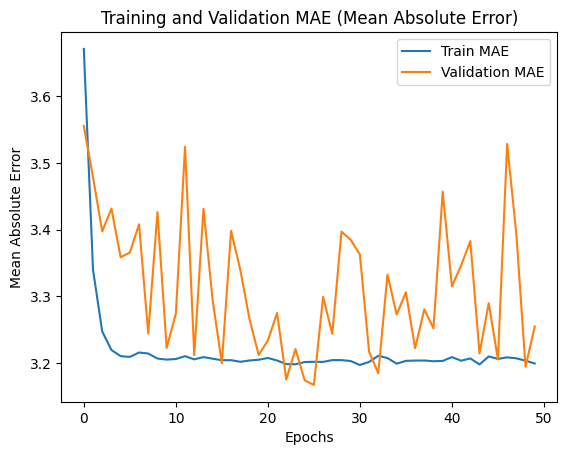

In [105]:
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("Training and Validation MAE (Mean Absolute Error)")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

We see that the MSE is 27.20, the MAE is 3.64, and the R² is 0.82, indicating the model performs well with a moderate error and a good fit, explaining 82% of the variance. The plots show that the training loss and MAE decrease quickly, but the validation loss and MAE fluctuate, suggesting potential overfitting. Therefore, we use early stopping to prevent overfitting and to save computational resources by halting training when no improvement is seen in the validation loss.

In [106]:
# Set lower learning rate
optimizer = Adam(learning_rate=0.0001)

# Build Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=len(X_features), activation='relu'))
nn_model.add(Dropout(0.5)) 
nn_model.add(BatchNormalization())  # Add batch normalization to stabilize
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5)) 
nn_model.add(Dense(1)) 

# Compile the model
nn_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = nn_model.fit(X_train, y_train, validation_data=(X_validation, y_validation),
                       epochs=50, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/50
11157/11157 - 5s - 457us/step - loss: 82.8287 - mae: 6.1221 - val_loss: 26.1227 - val_mae: 3.6531
Epoch 2/50
11157/11157 - 5s - 409us/step - loss: 49.4400 - mae: 4.7793 - val_loss: 26.5649 - val_mae: 3.6690
Epoch 3/50
11157/11157 - 5s - 412us/step - loss: 46.0037 - mae: 4.5992 - val_loss: 27.8851 - val_mae: 3.6425
Epoch 4/50
11157/11157 - 5s - 412us/step - loss: 44.1756 - mae: 4.5010 - val_loss: 27.5886 - val_mae: 3.6792
Epoch 5/50
11157/11157 - 5s - 407us/step - loss: 43.1257 - mae: 4.4428 - val_loss: 29.5664 - val_mae: 3.7401
Epoch 6/50
11157/11157 - 5s - 415us/step - loss: 42.1631 - mae: 4.4013 - val_loss: 26.0817 - val_mae: 3.6225
Epoch 7/50
11157/11157 - 4s - 401us/step - loss: 41.1115 - mae: 4.3511 - val_loss: 27.3009 - val_mae: 3.6725
Epoch 8/50
11157/11157 - 4s - 400us/step - loss: 40.0031 - mae: 4.2977 - val_loss: 27.7535 - val_mae: 3.6874
Epoch 9/50
11157/11157 - 4s - 394us/step - loss: 39.6413 - mae: 4.2781 - val_loss: 30.2269 - val_mae: 3.8291
Epoch 10/50
11157/1

In [107]:
# Predicion and evaluation
y_pred_nn = nn_model.predict(X_test)
evaluate_regression(y_test, y_pred_nn, threshold=0.5)

2989/2989 ━━━━━━━━━━━━━━━━━━━━ 1s 237us/step
MSE: 35.45, MAE: 4.09, R²: 0.77


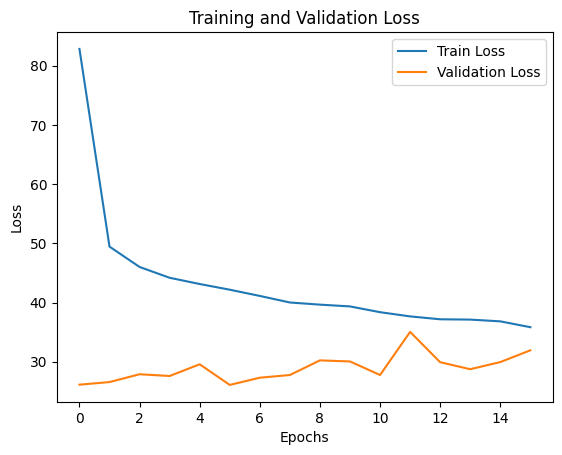

In [108]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

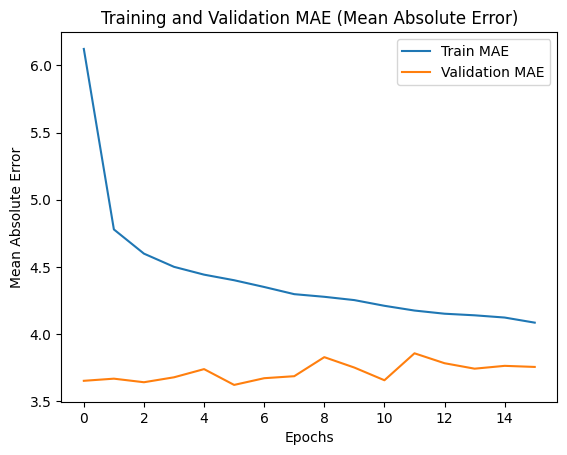

In [109]:
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("Training and Validation MAE (Mean Absolute Error)")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

We see that the MSE is 35.45, the MAE is 4.09, and the R² is 0.77, which shows that the model performs with moderate error but less accuracy compared to previous results. The plots indicate that the training loss steadily decreases, while the validation loss stabilizes, suggesting that early stopping helped prevent overfitting and achieved better generalization.

To compare the three models, we use MSE, MAE, and R² metrics.

In [110]:
# Function to evaluate and compare models
def compare_models(models, X_test, y_test, model_names):
    results = []
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((name, mse, mae, r2))
        
    results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'R²'])
    return results_df

# Example usage
models = [rf_model, nn_model, baseline_model]  # List of models
model_names = ['Random Forest', 'Neural Network', 'Linear Regression']  # Model names
comparison_results = compare_models(models, X_test, y_test, model_names)

# Display the comparison results
print(comparison_results)

2989/2989 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step
               Model        MSE       MAE        R²
0      Random Forest  27.668530  3.425832  0.818666
1     Neural Network  35.454572  4.094965  0.767638
2  Linear Regression  29.966981  3.674082  0.803602


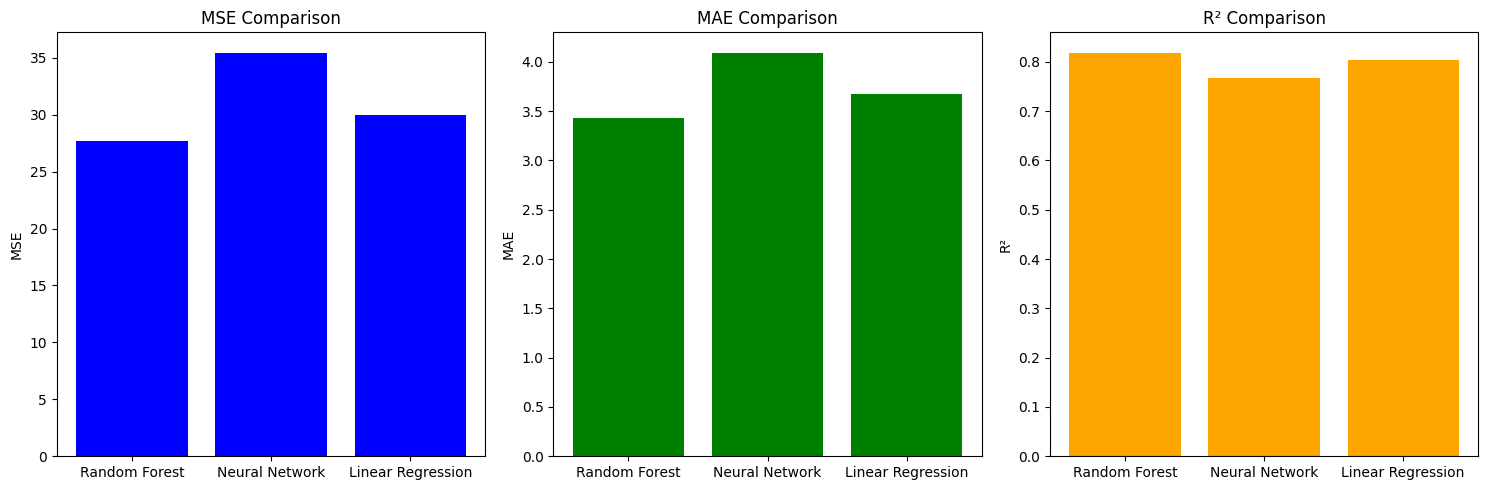

In [111]:
# Plot MSE, MAE, and R² for model comparison
def plot_comparison(results_df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # MSE Plot
    axes[0].bar(results_df['Model'], results_df['MSE'], color='blue')
    axes[0].set_title('MSE Comparison')
    axes[0].set_ylabel('MSE')

    # MAE Plot
    axes[1].bar(results_df['Model'], results_df['MAE'], color='green')
    axes[1].set_title('MAE Comparison')
    axes[1].set_ylabel('MAE')

    # R² Plot
    axes[2].bar(results_df['Model'], results_df['R²'], color='orange')
    axes[2].set_title('R² Comparison')
    axes[2].set_ylabel('R²')

    plt.tight_layout()
    plt.show()

# Plot the comparison
plot_comparison(comparison_results)

The MSE and MAE show that the Random Forest model has the lowest error, while the R² indicates that it explains more variance in the data compared to the Neural Network and Linear Regression models.

2989/2989 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step


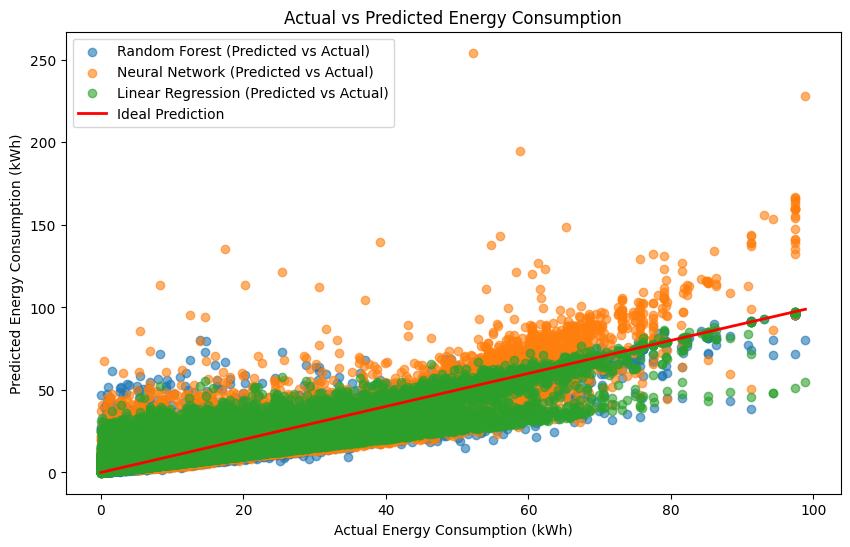

In [112]:
# Compare actual vs predicted for each model
def plot_actual_vs_predicted(y_test, models, model_names):
    plt.figure(figsize=(10, 6))
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        plt.scatter(y_test, y_pred, label=f'{name} (Predicted vs Actual)', alpha=0.6)
    
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
    plt.title('Actual vs Predicted Energy Consumption')
    plt.xlabel('Actual Energy Consumption (kWh)')
    plt.ylabel('Predicted Energy Consumption (kWh)')
    plt.legend()
    plt.show()

# Example usage
plot_actual_vs_predicted(y_test, models, model_names)

These plots also show that the Random Forest and Neural Network models are better suited for predicting energy consumption, which matches the comparison for MSE, MAE, and R², because they have predictions closer to the ideal line, indicating better accuracy and fit compared to Linear Regression

# **Word Count**
---

In [117]:
import json

with open('Project_done2.ipynb') as json_file:
    data = json.load(json_file)

print(data)

{'cells': [{'cell_type': 'markdown', 'metadata': {}, 'source': ['## **Initializing**']}, {'cell_type': 'code', 'execution_count': 51, 'metadata': {}, 'outputs': [], 'source': ['import warnings                               \n', "warnings.filterwarnings('ignore')\n", 'import pandas as pd\n', 'import numpy as np\n', 'import matplotlib.pyplot as plt\n', 'import seaborn as sns\n', 'from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler\n', 'from sklearn.cluster import KMeans\n', 'from sklearn.metrics import silhouette_score\n', 'from sklearn.decomposition import PCA\n', 'import pytz\n', 'from sklearn.metrics import silhouette_samples\n', 'from mpl_toolkits.axes_grid1 import make_axes_locatable\n', 'from sklearn.linear_model import LinearRegression\n', 'from sklearn.metrics import mean_squared_error, mean_absolute_error\n', 'from sklearn.ensemble import RandomForestRegressor\n', 'from tensorflow.keras.models import Sequential\n', 'from tensorflow.keras.layers import De

In [118]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

1761
